In [75]:
import scipy.io as io
import PIL.Image as Image
import numpy as np
import os
import glob
from matplotlib import pyplot as plt
from scipy.ndimage.filters import gaussian_filter 
import scipy
import json
import torchvision.transforms.functional as F
from matplotlib import cm as CM
from image import *
from model import CSRNet
import torch
%matplotlib inline

In [76]:
from torchvision import datasets, transforms
transform=transforms.Compose([
                       transforms.ToTensor(),transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                     std=[0.229, 0.224, 0.225]),
                   ])

In [77]:
model = CSRNet()

In [78]:
model = model.cpu()

In [79]:
checkpoint = torch.load('0model_best.pth.tar')

In [80]:
model.load_state_dict(checkpoint['state_dict'])

<All keys matched successfully>

Predicted Count :  11


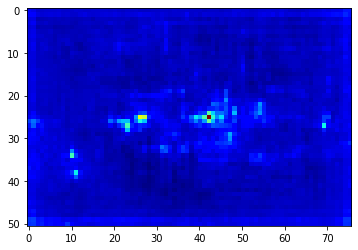

In [81]:
from matplotlib import cm as c
img = transform(Image.open('dataset/part_A_final/train_data/images/IMG_302.jpg').convert('RGB')).cpu()

output = model(img.unsqueeze(0))
print("Predicted Count : ",int(output.detach().cpu().sum().numpy()))
temp = np.asarray(output.detach().cpu().reshape(output.detach().cpu().shape[2],output.detach().cpu().shape[3]))
plt.imshow(temp,cmap = c.jet)
plt.show()